<a href="https://colab.research.google.com/github/m-nweke/ProjectsToDate/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [93]:
dataset = pd.read_csv('CC.csv')
x = dataset.iloc[:,[2,7,8,9,10,16,17]]
y = dataset.iloc[:,13]
print(x.shape, y.shape)
# see how many samples we have of each species
print(dataset["PURCHASES"].value_counts())

(8950, 7) (8950,)
0.00       2044
45.65        27
150.00       16
60.00        16
100.00       13
           ... 
963.35        1
1260.13       1
203.60        1
35.97         1
169.66        1
Name: PURCHASES, Length: 6203, dtype: int64


In [94]:
nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                     Null Count
Feature                        
MINIMUM_PAYMENTS            313
CREDIT_LIMIT                  1
TENURE                        0
PURCHASES_FREQUENCY           0
BALANCE                       0


In [95]:
new = pd.DataFrame(dataset.fillna(dataset.mean()))

In [96]:
nulls = pd.DataFrame(new.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                   Null Count
Feature                      
TENURE                      0
PRC_FULL_PAYMENT            0
BALANCE                     0
BALANCE_FREQUENCY           0
PURCHASES                   0


In [97]:
x = new.iloc[:,[2,7,8,9,10,16,17]]
y = new.iloc[:,13]
print(x.shape, y.shape)
# see how many samples we have of each species
print(new["PURCHASES"].value_counts())

(8950, 7) (8950,)
0.00       2044
45.65        27
150.00       16
60.00        16
100.00       13
           ... 
963.35        1
1260.13       1
203.60        1
35.97         1
169.66        1
Name: PURCHASES, Length: 6203, dtype: int64


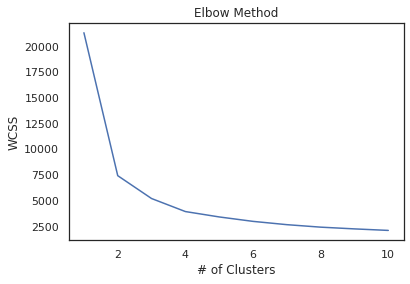

In [98]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()


In [99]:
nclusters = 2
km = KMeans(n_clusters= nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)

In [100]:
from sklearn import metrics
score=metrics.silhouette_score(x,km.labels_)
print(score)

0.7398749590675219


In [101]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array, columns= x.columns)

In [102]:
nclusters = 2
km = KMeans(n_clusters= nclusters)
km.fit(x_scaled)
y_cluster_kmeans = km.predict(x_scaled)

In [103]:
from sklearn import metrics
score=metrics.silhouette_score(x,km.labels_)
print(score)

0.268521847906901


In [106]:
x_scaler = scaler.transform(x)
pca = PCA(2)  # Instantiate the model with hyperparameters
x_pca = pca.fit_transform(x_scaler) # Fit to data and transform. Notice y is not specified!

In [109]:
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, dataset[['PURCHASES']]],axis=1)
print(finaldf)
scores_pca=pca.transform(x_scaler)

             0         1  PURCHASES
0     1.065522  0.483733      95.40
1     1.510859 -0.069947       0.00
2    -1.390272 -1.027939     773.17
3     1.454720  0.765417    1499.00
4     1.080545 -0.103412      16.00
...        ...       ...        ...
8945 -1.346587  1.145157     291.12
8946 -0.829171  0.451953     300.00
8947 -0.496566  1.331756     144.40
8948  1.911805  1.101999       0.00
8949  0.736841  0.158385    1093.25

[8950 rows x 3 columns]


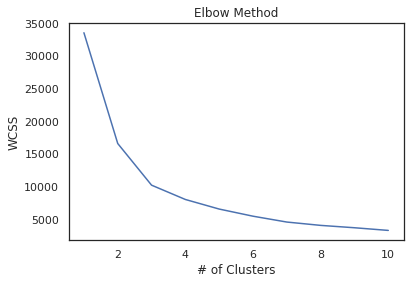

In [112]:
wcss=[]
for i in range(1,11):
  kmeans_pca= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
nclusters = 3
km = KMeans(n_clusters= nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)

In [114]:
from sklearn import metrics
score=metrics.silhouette_score(x,km.labels_)
print(score)

0.4007523761735748
